In [141]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [142]:
from image_processor import *
from vehicle_detection import VehicleDetectionPipeline
import pickle

In [82]:
def show(image):
    plt.imshow(image)
    plt.show()

def save_models(p):
    save(p.classifier,'classifier-all-ycrcb.p')
    save(p.scaler,'scaler-all-ycrcb.p')

def save(obj, name):
    pickle.dump(obj, open(name, 'wb'))
    
def load(name):
    obj = pickle.load(open(name, 'rb'))
    return obj

In [143]:
path = './data/full/*/*/*.png'

p = VehicleDetectionPipeline()

In [146]:
p.load()

pre_process_data
extract_image_paths
8792 8968
extract_features_for_images
asd
> /Users/amoghparam/workspace/amogh/sdc/sdc_project5/image_processor.py(47)extract_features()
-> self.image = self.convert_to_color_space(color_space=color_space)
(Pdb) n
> /Users/amoghparam/workspace/amogh/sdc/sdc_project5/image_processor.py(49)extract_features()
-> spatial_bin_features = self.extract_bin_spatial(size=spatial_size)
(Pdb) n
> /Users/amoghparam/workspace/amogh/sdc/sdc_project5/image_processor.py(50)extract_features()
-> hist_features = self.extract_color_histogram_features(bins=hist_bins, range=hist_range)
(Pdb) s
--Call--
> /Users/amoghparam/workspace/amogh/sdc/sdc_project5/image_processor.py(65)extract_color_histogram_features()
-> def extract_color_histogram_features(self, bins=32, range=(0,256)):
(Pdb) n
> /Users/amoghparam/workspace/amogh/sdc/sdc_project5/image_processor.py(70)extract_color_histogram_features()
-> rhist = np.histogram(self.image[:,:,0], bins=bins, range=range)
(Pdb) n
> 

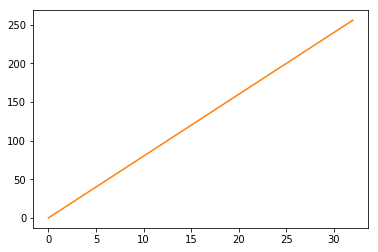

(Pdb)  plt.plot(rhist[0]); plt.show()


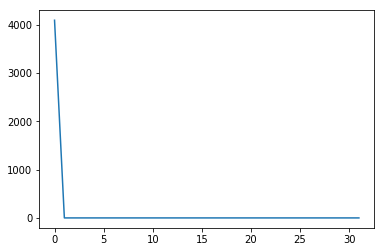

(Pdb)  plt.plot(rhist[0], nbins=len(rhist[0]))
*** AttributeError: Unknown property nbins
(Pdb) plt.plot(rhist[0], bins=len(rhist[0]))
*** AttributeError: Unknown property bins
(Pdb) plt.plot(rhist[0], rhist[1])
*** ValueError: x and y must have same first dimension, but have shapes (32,) and (33,)
(Pdb) plt.plot(rhist[0], [0].extend(rhist[1]))
*** ValueError: x and y must not be None
(Pdb) [0].extend(rhist[1])
(Pdb) plt.hist(rhist[0])
(array([ 31.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]), array([    0. ,   409.6,   819.2,  1228.8,  1638.4,  2048. ,  2457.6,
        2867.2,  3276.8,  3686.4,  4096. ]), <a list of 10 Patch objects>)
(Pdb) plt.show()


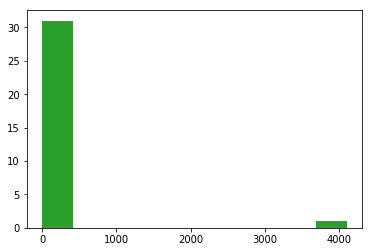

(Pdb) plt.hist(rhist)
([array([ 31.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]), array([ 33.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.])], array([    0. ,   409.6,   819.2,  1228.8,  1638.4,  2048. ,  2457.6,
        2867.2,  3276.8,  3686.4,  4096. ]), <a list of 2 Lists of Patches objects>)
(Pdb) plt.hist(self.image[:,:,0], bins=bins, range=range)
([array([ 64.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]), array([ 64.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]), array([ 64.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0

(Pdb) plt.show()


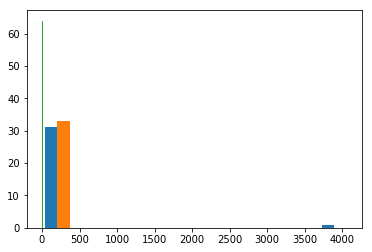

(Pdb) rhist[1]
array([   0.,    8.,   16.,   24.,   32.,   40.,   48.,   56.,   64.,
         72.,   80.,   88.,   96.,  104.,  112.,  120.,  128.,  136.,
        144.,  152.,  160.,  168.,  176.,  184.,  192.,  200.,  208.,
        216.,  224.,  232.,  240.,  248.,  256.])
(Pdb) rhist.len
*** AttributeError: 'tuple' object has no attribute 'len'
(Pdb) rhist.shape
*** AttributeError: 'tuple' object has no attribute 'shape'
(Pdb) len(rhist[1])
33
(Pdb) bin_centers
*** NameError: name 'bin_centers' is not defined
(Pdb) n
> /Users/amoghparam/workspace/amogh/sdc/sdc_project5/image_processor.py(72)extract_color_histogram_features()
-> bhist = np.histogram(self.image[:,:,2], bins=bins, range=range)
(Pdb) n
> /Users/amoghparam/workspace/amogh/sdc/sdc_project5/image_processor.py(75)extract_color_histogram_features()
-> bin_edges = rhist[1]
(Pdb) n
> /Users/amoghparam/workspace/amogh/sdc/sdc_project5/image_processor.py(76)extract_color_histogram_features()
-> bin_centers = (bin_edges[1:]  + bin

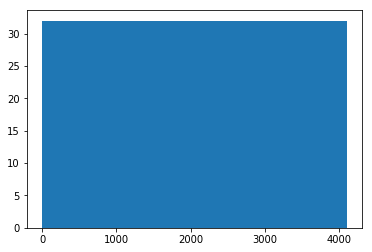

(Pdb) plt.hist(rhist[0], bins=bin_centers)
(array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.]), array([   4.,   12.,   20.,   28.,   36.,   44.,   52.,   60.,   68.,
         76.,   84.,   92.,  100.,  108.,  116.,  124.,  132.,  140.,
        148.,  156.,  164.,  172.,  180.,  188.,  196.,  204.,  212.,
        220.,  228.,  236.,  244.,  252.]), <a list of 31 Patch objects>)
(Pdb) plt.show()


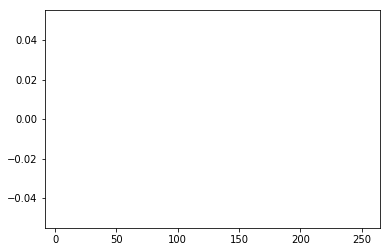

(Pdb) plt.hist(rhist[0]); plt.show()
(array([ 31.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]), array([    0. ,   409.6,   819.2,  1228.8,  1638.4,  2048. ,  2457.6,
        2867.2,  3276.8,  3686.4,  4096. ]), <a list of 10 Patch objects>)


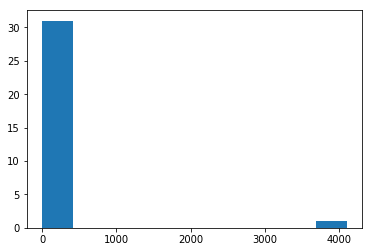

(Pdb) plt.hist(bhist[0]); plt.show()
(array([ 31.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]), array([    0. ,   409.6,   819.2,  1228.8,  1638.4,  2048. ,  2457.6,
        2867.2,  3276.8,  3686.4,  4096. ]), <a list of 10 Patch objects>)


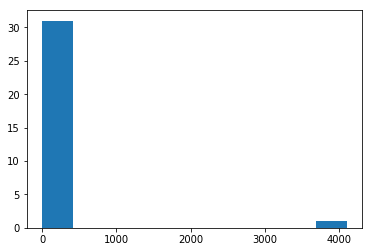

(Pdb) plt.hist(ghist[0]); plt.show()
(array([ 31.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]), array([    0. ,   409.6,   819.2,  1228.8,  1638.4,  2048. ,  2457.6,
        2867.2,  3276.8,  3686.4,  4096. ]), <a list of 10 Patch objects>)


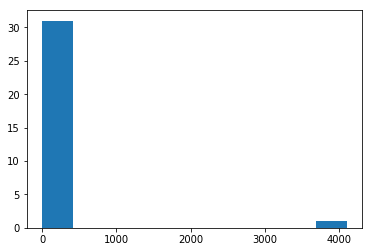

(Pdb) plt.hist(rhist[0], bins=32); plt.show()
(array([ 31.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]), array([    0.,   128.,   256.,   384.,   512.,   640.,   768.,   896.,
        1024.,  1152.,  1280.,  1408.,  1536.,  1664.,  1792.,  1920.,
        2048.,  2176.,  2304.,  2432.,  2560.,  2688.,  2816.,  2944.,
        3072.,  3200.,  3328.,  3456.,  3584.,  3712.,  3840.,  3968.,
        4096.]), <a list of 32 Patch objects>)


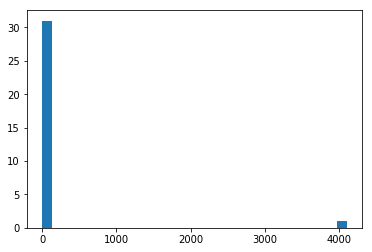

(Pdb) rhist
(array([4096,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0]), array([   0.,    8.,   16.,   24.,   32.,   40.,   48.,   56.,   64.,
         72.,   80.,   88.,   96.,  104.,  112.,  120.,  128.,  136.,
        144.,  152.,  160.,  168.,  176.,  184.,  192.,  200.,  208.,
        216.,  224.,  232.,  240.,  248.,  256.]))
(Pdb) plt.plot(rhist)
*** ValueError: setting an array element with a sequence.
(Pdb) plt.plot(rhist[0])
(Pdb) plt.show
<function show at 0x114fb40d0>
(Pdb) plt.show()


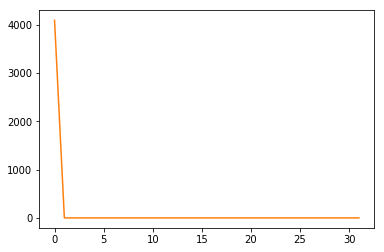

(Pdb) plt.bar(bin_centers, rhist[0])
<Container object of 32 artists>
(Pdb) plt.show()


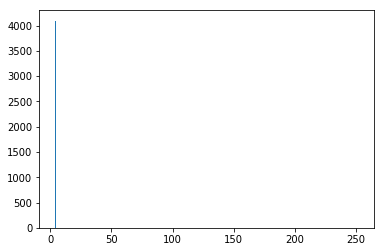

(Pdb) plt.bar(rhist[0])
*** TypeError: bar() missing 1 required positional argument: 'height'
(Pdb) plt.bar(bin_centers, rhist[0]); plt.show()
<Container object of 32 artists>


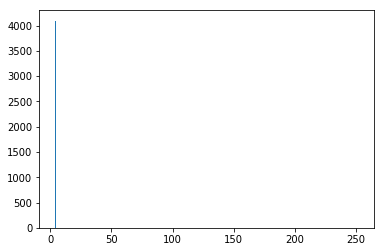

(Pdb) bin_centers
array([   4.,   12.,   20.,   28.,   36.,   44.,   52.,   60.,   68.,
         76.,   84.,   92.,  100.,  108.,  116.,  124.,  132.,  140.,
        148.,  156.,  164.,  172.,  180.,  188.,  196.,  204.,  212.,
        220.,  228.,  236.,  244.,  252.])
(Pdb) plt.bar(bin_centers, rhist[0], width=20); plt.show()
<Container object of 32 artists>


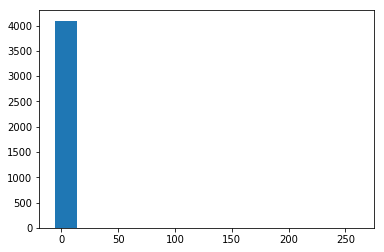

(Pdb) plt.bar(bin_centers, bhist[0], width=20); plt.show()
<Container object of 32 artists>


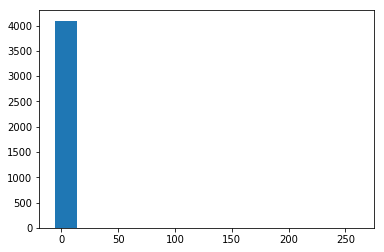

(Pdb) plt.bar(bin_centers, ghist[0], width=20); plt.show()
<Container object of 32 artists>


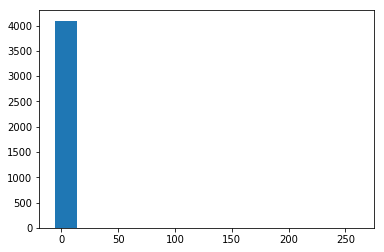

(Pdb) show(self.image)
*** NameError: name 'show' is not defined
(Pdb) plt.imread(self.image); plt.show()
*** TypeError: Object does not appear to be a 8-bit string path or a Python file-like object
(Pdb) self
(Pdb) self.image
array([[[ 0.64251769,  0.47807315,  0.49813768],
        [ 0.64251769,  0.47807315,  0.49813768],
        [ 0.63976866,  0.48003319,  0.49747637],
        ..., 
        [ 0.41530985,  0.48349193,  0.46482408],
        [ 0.42040393,  0.485452  ,  0.46416277],
        [ 0.42157647,  0.48741207,  0.46350145]],

       [[ 0.64251769,  0.47807315,  0.49813768],
        [ 0.64251769,  0.47807315,  0.49813768],
        [ 0.63976866,  0.48003319,  0.49747637],
        ..., 
        [ 0.41530985,  0.48349193,  0.46482408],
        [ 0.42040393,  0.485452  ,  0.46416277],
        [ 0.42157647,  0.48741207,  0.46350145]],

       [[ 0.63932163,  0.48035192,  0.49551675],
        [ 0.63932163,  0.48035192,  0.49551675],
        [ 0.63657254,  0.48231202,  0.49485546],
      

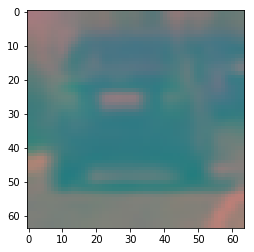

(Pdb) plt.imsave('./report_images/ycrcb',self.image)
(Pdb) plt.imsave('./report_images/ycrcb.png',self.image)
(Pdb) n
> /Users/amoghparam/workspace/amogh/sdc/sdc_project5/image_processor.py(81)extract_color_histogram_features()
-> return hist_features
(Pdb) r
--Return--
> /Users/amoghparam/workspace/amogh/sdc/sdc_project5/image_processor.py(81)extract_color_histogram_features()->array([4096, ...,    0,    0])
-> return hist_features
(Pdb) r
> /Users/amoghparam/workspace/amogh/sdc/sdc_project5/image_processor.py(52)extract_features()
-> if hog_channel is not None:
(Pdb) n
> /Users/amoghparam/workspace/amogh/sdc/sdc_project5/image_processor.py(53)extract_features()
-> hog_features = self.extract_hog_features(
(Pdb) r
--Return--
> /Users/amoghparam/workspace/amogh/sdc/sdc_project5/image_processor.py(63)extract_features()->array([ 0.642...  0.07071173])
-> return self.feature_vector
(Pdb) self.feature_vector
array([ 0.64251769,  0.47807315,  0.49813768, ...,  0.        ,
        0.02090365

BdbQuit: 

In [149]:
p.pre_process_data(path=path)

In [60]:
save(p.X_train, 'X_train.p')
save(p.y_train, 'y_train.p')
save(p.X_test, 'X_test.p')
save(p.y_test, 'y_test.p')

In [148]:
p.train()

train


KeyboardInterrupt: 

In [76]:
classifier = load('output_models/classifier-all-ycrcb.p')
scaler = load('output_models/scaler-all-ycrcb.p')

In [267]:
i=10

In [268]:
ip = ImageProcessor('./test_images/test{}.jpg'.format(i))

> /Users/amoghparam/workspace/amogh/sdc/sdc_project5/image_processor.py(282)run_find_cars()
-> self.super_impose_previous_frame_detections(previous_frame_processor)
(Pdb) plt.imshow(ip.working_image); plt.show()
*** NameError: name 'ip' is not defined
(Pdb) plt.imshow(self.working_image); plt.show()


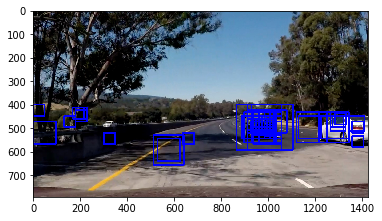

(Pdb) plt.imshow(ip.heat); plt.show()
*** NameError: name 'ip' is not defined
(Pdb) plt.imshow(self.heat); plt.show()


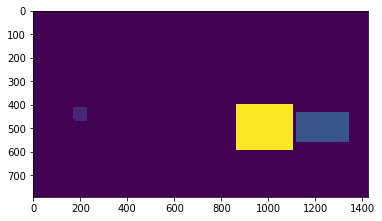

(Pdb) n
> /Users/amoghparam/workspace/amogh/sdc/sdc_project5/image_processor.py(283)run_find_cars()
-> self.apply_threshold(2)
(Pdb) plt.imshow(self.heat); plt.show()


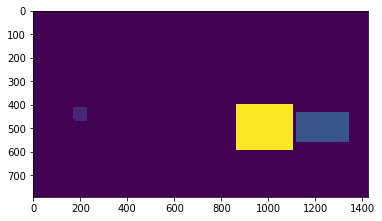

(Pdb) n
> /Users/amoghparam/workspace/amogh/sdc/sdc_project5/image_processor.py(285)run_find_cars()
-> labels = label(self.heat)
(Pdb) plt.imshow(self.heat); plt.show()


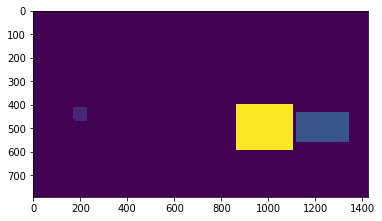

(Pdb) q


BdbQuit: 

In [269]:
ip.run_find_cars(classifier, scaler)
show(ip.working_image)
show(ip.result_image)

In [261]:
plt.imsave('./report_images/sliding_windows_better.png', ip.working_image)

In [253]:
ip = ImageProcessor('./test_images/test{}.jpg'.format(i))

In [254]:
ip.window_objs = []

In [255]:
ip.slide_window(x_start_stop=(0,ip.image.shape[1]), 
                y_start_stop=(ip.image.shape[0]*0.5,ip.image.shape[0]))

In [256]:
img = ip.draw_boxes(ip.window_objs[0]['window_list'])

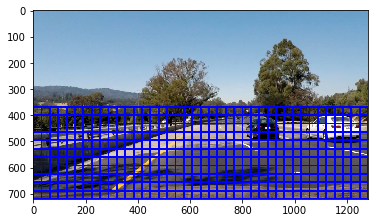

In [257]:
show(img)
plt.imsave('./report_images/sliding_windows.png', img)

In [131]:
from matplotlib import image as mpimg

In [137]:
mpimg.imsave('./report_images/ycrcb_result.png', ip.result_image)

> /Users/amoghparam/workspace/amogh/sdc/sdc_project5/image_processor.py(336)add_heat()
-> for box in self.car_windows:
(Pdb) c
--Return--
> /Users/amoghparam/workspace/amogh/sdc/sdc_project5/image_processor.py(336)add_heat()->None
-> for box in self.car_windows:
(Pdb) plt.imshow(self.heat); plt.show()


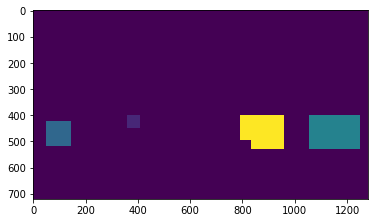

(Pdb) plt.imsave('./report_images/heat-2.png',self.heat); plt.imshow(self.heat);plt.show()


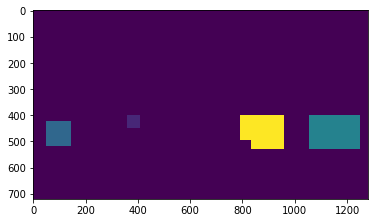

(Pdb) self.heat[self.heat <= 3] = 0
(Pdb) plt.imsave('./report_images/heat-2-after-threshold.png',self.heat); plt.imshow(self.heat);plt.show()


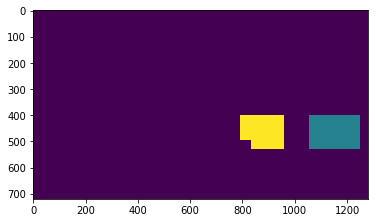

In [ ]:
for i in range(1,12):
    ip = ImageProcessor('./test_images/test{}.jpg'.format(i))
    ip.run_find_cars(classifier, scaler)
    show(ip.working_image)
    show(ip.result_image)    
    plt.imsave('./report_images/final_{}.png'.format(i), ip.result_image)

In [ ]:
plt.imsave('./report_images/heat-2-after-threshold.png',self.heat); plt.imshow(self.heat);plt.show()